In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from perceptron import Perceptron


In [4]:
df = pd.read_csv("weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [5]:
print(df['Formatted Date'].dtypes) 
df['Formatted Date'] = df['Formatted Date'].str.split(' ').str[0]
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce').dt.tz_localize(None)
print(df['Formatted Date'].dtypes) 
print(df['Formatted Date'].head()) 

object
datetime64[ns]
0   2006-04-01
1   2006-04-01
2   2006-04-01
3   2006-04-01
4   2006-04-01
Name: Formatted Date, dtype: datetime64[ns]


In [6]:
df['Day of Year'] = df['Formatted Date'].dt.dayofyear
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Day of Year
0,2006-04-01,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,91
1,2006-04-01,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,91
2,2006-04-01,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,91
3,2006-04-01,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,91
4,2006-04-01,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,253
96449,2016-09-09,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,253
96450,2016-09-09,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,253
96451,2016-09-09,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,253


In [7]:
daily_avg_temp = df.groupby('Day of Year')['Temperature (C)'].mean().reset_index()
daily_avg_temp.columns = ['Day of Year', 'Average Temperature (C)']
daily_avg_temp

,Day of Year,Average Temperature (C)
0,1,-1.211048
1,2,-0.310606
2,3,-0.437689
3,4,-0.755240
4,5,0.451999
...,...,...
361,362,-0.676768
362,363,-0.765236
363,364,-1.586974
364,365,-1.938952


In [8]:
X = daily_avg_temp['Day of Year'].values
Y = daily_avg_temp['Average Temperature (C)'].values

X = X.reshape(-1,1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

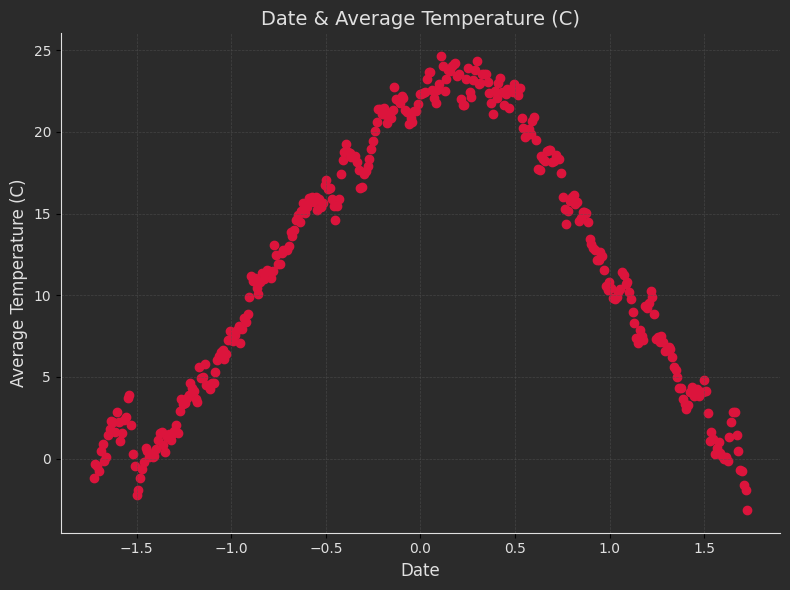

In [9]:
fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('#2b2b2b')  
ax = plt.gca()
ax.set_facecolor('#2b2b2b')  

plt.scatter(X, Y ,c='crimson', marker='o', label='Date')



plt.title('Date & Average Temperature (C)', fontsize=14, color='#e0e0e0')
plt.xlabel('Date', fontsize=12, color='#e0e0e0')
plt.ylabel('Average Temperature (C)', fontsize=12, color='#e0e0e0')


plt.xticks(fontsize=10, color='#e0e0e0')
plt.yticks(fontsize=10, color='#e0e0e0')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#e0e0e0')
ax.spines['bottom'].set_color('#e0e0e0')


plt.grid(color='#555555', linestyle='--', linewidth=0.5, alpha=0.6)




plt.tight_layout()


plt.show()

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=.25, random_state=42)

x_train = x_train.reshape(-1, 1)
x_validation = x_validation.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [11]:
model = Perceptron(input_size=x_train.shape[1] , learning_rate=0.0002, epochs=50, activation="relu")
model.fit(x_train, y_train, x_validation, y_validation)


 12%|█▏        | 6/50 [00:00<00:01, 26.30it/s]

Epoch 1:
Train Loss: 11.988385858224877, Train Accuracy: 0.0
Validation Loss: 9.881716718757204, Validation Accuracy: 0.0
Epoch 2:
Train Loss: 11.522443245016404, Train Accuracy: 0.0
Validation Loss: 9.532364083120862, Validation Accuracy: 0.0
Epoch 3:
Train Loss: 10.998339245287045, Train Accuracy: 0.0
Validation Loss: 9.177950023526227, Validation Accuracy: 0.0
Epoch 4:
Train Loss: 10.517281032641243, Train Accuracy: 0.0
Validation Loss: 8.886774414855033, Validation Accuracy: 0.0
Epoch 5:
Train Loss: 10.094207636418796, Train Accuracy: 0.0
Validation Loss: 8.661532453679166, Validation Accuracy: 0.0
Epoch 6:
Train Loss: 9.735303392471323, Train Accuracy: 0.0
Validation Loss: 8.478150924010265, Validation Accuracy: 0.0
Epoch 7:
Train Loss: 9.41545197828439, Train Accuracy: 0.0
Validation Loss: 8.336928535464583, Validation Accuracy: 0.0


 26%|██▌       | 13/50 [00:00<00:01, 30.60it/s]

Epoch 8:
Train Loss: 9.129198639330552, Train Accuracy: 0.0
Validation Loss: 8.222512953558462, Validation Accuracy: 0.0
Epoch 9:
Train Loss: 8.877659081611379, Train Accuracy: 0.0
Validation Loss: 8.140958239882258, Validation Accuracy: 0.0
Epoch 10:
Train Loss: 8.655871852323124, Train Accuracy: 0.0
Validation Loss: 8.089499983971804, Validation Accuracy: 0.0
Epoch 11:
Train Loss: 8.4601914500522, Train Accuracy: 0.0
Validation Loss: 8.05513709437, Validation Accuracy: 0.0
Epoch 12:
Train Loss: 8.29683494302574, Train Accuracy: 0.0
Validation Loss: 8.03938061767605, Validation Accuracy: 0.0
Epoch 13:
Train Loss: 8.158309103973576, Train Accuracy: 0.0
Validation Loss: 8.037999083745127, Validation Accuracy: 0.0
Epoch 14:
Train Loss: 8.03272546857095, Train Accuracy: 0.0
Validation Loss: 8.043715139861812, Validation Accuracy: 0.0
Epoch 15:
Train Loss: 7.915717201764838, Train Accuracy: 0.0
Validation Loss: 8.051471897829954, Validation Accuracy: 0.0


 42%|████▏     | 21/50 [00:00<00:00, 35.46it/s]

Epoch 16:
Train Loss: 7.812390018075307, Train Accuracy: 0.0
Validation Loss: 8.064708130533074, Validation Accuracy: 0.0
Epoch 17:
Train Loss: 7.718488397664904, Train Accuracy: 0.0
Validation Loss: 8.084625731912945, Validation Accuracy: 0.0
Epoch 18:
Train Loss: 7.636983770893981, Train Accuracy: 0.0
Validation Loss: 8.109253655069866, Validation Accuracy: 0.0
Epoch 19:
Train Loss: 7.561502778102106, Train Accuracy: 0.0
Validation Loss: 8.135706577678329, Validation Accuracy: 0.0
Epoch 20:
Train Loss: 7.490623080315322, Train Accuracy: 0.0
Validation Loss: 8.162696834282357, Validation Accuracy: 0.0
Epoch 21:
Train Loss: 7.4290988616606555, Train Accuracy: 0.0
Validation Loss: 8.18921167134932, Validation Accuracy: 0.0
Epoch 22:
Train Loss: 7.375730895859773, Train Accuracy: 0.0
Validation Loss: 8.216106948751355, Validation Accuracy: 0.0
Epoch 23:
Train Loss: 7.328702681609547, Train Accuracy: 0.0
Validation Loss: 8.241826583478245, Validation Accuracy: 0.0
Epoch 24:
Train Loss: 7.

 60%|██████    | 30/50 [00:00<00:00, 36.81it/s]

Epoch 25:
Train Loss: 7.256413212306537, Train Accuracy: 0.0
Validation Loss: 8.292369795802543, Validation Accuracy: 0.0
Epoch 26:
Train Loss: 7.227310889246244, Train Accuracy: 0.0
Validation Loss: 8.317065666089697, Validation Accuracy: 0.0
Epoch 27:
Train Loss: 7.201103319267751, Train Accuracy: 0.0
Validation Loss: 8.340660316832473, Validation Accuracy: 0.0
Epoch 28:
Train Loss: 7.177086196888564, Train Accuracy: 0.0
Validation Loss: 8.362912052861878, Validation Accuracy: 0.0
Epoch 29:
Train Loss: 7.156304270125667, Train Accuracy: 0.0
Validation Loss: 8.383897309363963, Validation Accuracy: 0.0
Epoch 30:
Train Loss: 7.137628127891414, Train Accuracy: 0.0
Validation Loss: 8.404196559207605, Validation Accuracy: 0.0
Epoch 31:
Train Loss: 7.120444244121656, Train Accuracy: 0.0
Validation Loss: 8.42349617380555, Validation Accuracy: 0.0
Epoch 32:
Train Loss: 7.1050047111703, Train Accuracy: 0.0
Validation Loss: 8.441698223421858, Validation Accuracy: 0.0


 76%|███████▌  | 38/50 [00:01<00:00, 38.14it/s]

Epoch 33:
Train Loss: 7.090443395428799, Train Accuracy: 0.0
Validation Loss: 8.458872795354218, Validation Accuracy: 0.0
Epoch 34:
Train Loss: 7.076710340060547, Train Accuracy: 0.0
Validation Loss: 8.47636671302472, Validation Accuracy: 0.0
Epoch 35:
Train Loss: 7.063758430147949, Train Accuracy: 0.0
Validation Loss: 8.493343143867378, Validation Accuracy: 0.0
Epoch 36:
Train Loss: 7.051543231014443, Train Accuracy: 0.0
Validation Loss: 8.510333726932021, Validation Accuracy: 0.0
Epoch 37:
Train Loss: 7.040403811077072, Train Accuracy: 0.0
Validation Loss: 8.52639651428441, Validation Accuracy: 0.0
Epoch 38:
Train Loss: 7.030722336350176, Train Accuracy: 0.0
Validation Loss: 8.541543502951185, Validation Accuracy: 0.0
Epoch 39:
Train Loss: 7.0215909226787225, Train Accuracy: 0.0
Validation Loss: 8.555826901915992, Validation Accuracy: 0.0
Epoch 40:
Train Loss: 7.0137471818176875, Train Accuracy: 0.0
Validation Loss: 8.569295943986374, Validation Accuracy: 0.0
Epoch 41:
Train Loss: 7.

 94%|█████████▍| 47/50 [00:01<00:00, 38.36it/s]

Epoch 42:
Train Loss: 7.000037189219477, Train Accuracy: 0.0
Validation Loss: 8.594661981618833, Validation Accuracy: 0.0
Epoch 43:
Train Loss: 6.9940711129236, Train Accuracy: 0.0
Validation Loss: 8.606299795000298, Validation Accuracy: 0.0
Epoch 44:
Train Loss: 6.988444303464565, Train Accuracy: 0.0
Validation Loss: 8.61727388550563, Validation Accuracy: 0.0
Epoch 45:
Train Loss: 6.983137466691336, Train Accuracy: 0.0
Validation Loss: 8.627622102622905, Validation Accuracy: 0.0
Epoch 46:
Train Loss: 6.978132405789389, Train Accuracy: 0.0
Validation Loss: 8.637380137630545, Validation Accuracy: 0.0
Epoch 47:
Train Loss: 6.97353011613655, Train Accuracy: 0.0
Validation Loss: 8.646581646649686, Validation Accuracy: 0.0
Epoch 48:
Train Loss: 6.96940861599798, Train Accuracy: 0.0
Validation Loss: 8.655258366681217, Validation Accuracy: 0.0
Epoch 49:
Train Loss: 6.965824985998422, Train Accuracy: 0.0
Validation Loss: 8.663440225027289, Validation Accuracy: 0.0


100%|██████████| 50/50 [00:01<00:00, 35.18it/s]

Epoch 50:
Train Loss: 6.962714916753583, Train Accuracy: 0.0
Validation Loss: 8.671155442474575, Validation Accuracy: 0.0


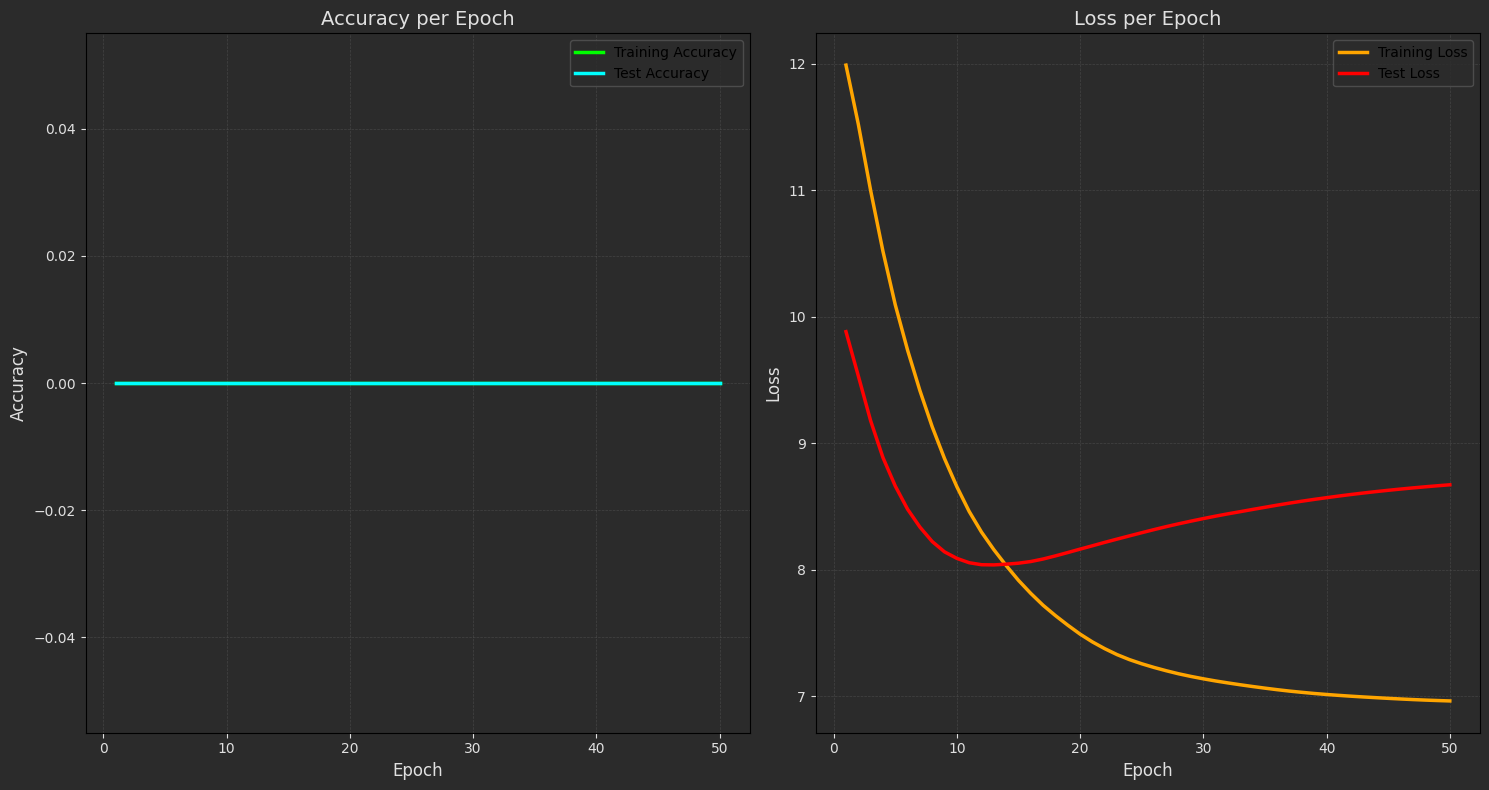

In [12]:
epochs = range(1, model.epochs + 1)

fig = plt.figure(figsize=(15, 8))
fig.patch.set_facecolor('#2b2b2b')  

ax1 = fig.add_subplot(121)  
ax2 = fig.add_subplot(122)  


ax1.plot(epochs, model.train_accuracies, label='Training Accuracy', color='lime', linewidth=2.5)
ax1.plot(epochs, model.validation_accuracies, label='Test Accuracy', color='cyan', linewidth=2.5)
ax1.set_title("Accuracy per Epoch", fontsize=14, color='#e0e0e0')
ax1.set_xlabel("Epoch", fontsize=12, color='#e0e0e0')
ax1.set_ylabel("Accuracy", fontsize=12, color='#e0e0e0')
ax1.legend(loc='best', fontsize=10, facecolor='#2b2b2b', edgecolor='#555555')
ax1.tick_params(axis='x', colors='#e0e0e0')
ax1.tick_params(axis='y', colors='#e0e0e0')
ax1.grid(color='#555555', linestyle='--', linewidth=0.5, alpha=0.6)
ax1.set_facecolor('#2b2b2b')  


ax2.plot(epochs, model.train_losses, label='Training Loss', color='orange', linewidth=2.5)
ax2.plot(epochs, model.validation_losses, label='Test Loss', color='red', linewidth=2.5)
ax2.set_title("Loss per Epoch", fontsize=14, color='#e0e0e0')
ax2.set_xlabel("Epoch", fontsize=12, color='#e0e0e0')
ax2.set_ylabel("Loss", fontsize=12, color='#e0e0e0')
ax2.legend(loc='best', fontsize=10, facecolor='#2b2b2b', edgecolor='#555555')
ax2.tick_params(axis='x', colors='#e0e0e0')
ax2.tick_params(axis='y', colors='#e0e0e0')
ax2.grid(color='#555555', linestyle='--', linewidth=0.5, alpha=0.6)
ax2.set_facecolor('#2b2b2b') 


plt.tight_layout()
plt.show()



In [13]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Test Loss: 7.2851150216046765, Test Accuracy: 0.0


In [16]:
model.save('models')